# **IMDB Movie Reviews Dataset - Unsupervised Learning**
  1. Data Preprocessing
  2. Data Visualization
  3. K-means Clustering

### **Importing Needed Libraies**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Importing Needed Dataset**

In [2]:
df = pd.read_csv('imdb.csv')
df. head(5)

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550,3240,1921,video.movie,1,0,19,96,85,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319,5700,1925,video.movie,2,1,35,110,122,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007,9180,1927,video.movie,3,4,67,428,376,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521,6420,1926,video.movie,1,1,53,123,219,3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057,5220,1931,video.movie,2,0,38,187,186,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
# To view shape of the dataset.
df.shape

(14761, 48)

## **1. Data Preprocessing**
  1. Data preproccessing is a technique which is used to transform raw data into useful & efficient format. 
  2. There are three steps in preprocessing.
    1. Data Cleaning
    2. Data Transformation
    3. Data Reduction

### **1.1. Missing Value Treatment**
How to identify missing values 
  1. describe() 
  2. isnull().sum()

Dealing with missing values 
  1. Imputation 
    1. continuous variable - mean, median, regression model
    2. categorical variable - mode, classification model 
  2. Deletion (Not reccommended - otherwise if you have large amount of data you can go with this)
    1. Row-wise deletion 
    2. Column-wise deletion


In [4]:
# To identify null values in the dataframe
df.isnull().sum()

fn                      0
tid                     0
title                   0
wordsInTitle           13
url                     0
imdbRating           1179
ratingCount          1206
duration             1031
year                   45
type                    4
nrOfWins                1
nrOfNominations         0
nrOfPhotos              0
nrOfNewsArticles        0
nrOfUserReviews         0
nrOfGenre               0
Action                  0
Adult                   0
Adventure               0
Animation               0
Biography               0
Comedy                  0
Crime                   0
Documentary             0
Drama                   0
Family                  0
Fantasy                 0
FilmNoir                0
GameShow                0
History                 0
Horror                  0
Music                   0
Musical                 0
Mystery                 0
News                    0
RealityTV               0
Romance                 0
SciFi                   0
Short       

In [5]:
# since in columns unnamed:44,unnamed:45,unnamed:46,unnamed:47 most of values are null, we dropping it.
# columns such as fn,tid,title,wordsInTitle,url,year are not needed for training
df = df.drop(columns=['fn', 'tid', 'title', 'wordsInTitle', 'url', 'year', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47'], axis=1)
df.shape

(14761, 38)

In [6]:
# missing value imputation in type column
df['type'].value_counts()

video.movie      10731
video.episode     1921
video.tv          1562
game               118
2006                18
                 ...  
6660                 1
1924                 1
6540                 1
90                   1
1933                 1
Name: type, Length: 121, dtype: int64

In [7]:
# since only 4 missing values in this column, we are filling those value with mode of the column.
df['type'].fillna('video.movie',inplace=True)
df['type'].isnull().sum()

0

In [8]:
# missing value imputation in nrOfWins column
df['nrOfWins'].value_counts()

0       8317
1       1694
2        914
3        631
4        413
        ... 
114        1
1995       1
175        1
102        1
1975       1
Name: nrOfWins, Length: 133, dtype: int64

In [9]:
df['nrOfWins'].fillna('0', inplace=True)
df['nrOfWins'].isnull().sum()

0

In [10]:
# missing value imputation in duration column
df['duration'].unique()

array(['3240', '5700', '9180', '6420', '5220', '7020', '6300', '14280',
       '7740', '6120', '7500', '7800', '7140', '6000', '10320', '6840',
       '6060', '5280', '4800', '7560', '6240', '8280', '6600', '5520',
       '5100', '8580', '6180', '7080', '6960', '6480', '6720', '12420',
       '5580', '5760', '9660', '5460', '7680', '12720', '8160', '5940',
       '7200', '10440', '6540', '8040', '11160', '12960', '8.6', '7260',
       '7920', '7860', '6360', '9600', '10500', '12000', '11040', '7440',
       '7980', '6780', '10920', '5640', '9780', '8640', '8940', '6900',
       '11280', '11460', '379114', '13740', '9720', '8220', '5340',
       '5880', '9300', '5160', '7620', '8760', '5040', '11700', '8520',
       '9240', '10620', '10680', '10200', '4860', '11340', '10140',
       '8340', '12060', '10740', '13440', '7320', '9000', '6660', '8100',
       '9360', '27617', '8400', '9420', '9060', '9120', '9480', '8880',
       '8.2', '9900', '10800', '7380', nan, '4200', '480', '9189', '

In [11]:
# This below one line of code is used to avoid SettingWithCopying Warning.
# SettingWithCopying Warning occurs during missing valur treatment.
pd.options.mode.chained_assignment = None

In [12]:
def duration_MissingValueTreatment():
  for i in range(len(df)):
    if not (str(df['duration'][i])).isdigit():
      df['duration'][i] = '0'

  df['duration'] = df['duration'].astype(str).astype(int)
  duration_Mean = df['duration'].mean()
  df['duration'].replace({0:duration_Mean}, inplace=True)

In [13]:
duration_MissingValueTreatment()
df['duration'].isnull().sum()

0

In [14]:
df['duration'].value_counts()

5391.042341     1067
1800.000000      902
3600.000000      614
5400.000000      429
6000.000000      295
                ... 
251.000000         1
3472.000000        1
11940.000000       1
28200.000000       1
2851.000000        1
Name: duration, Length: 633, dtype: int64

In [15]:
# missing value imputation in ratingCount column
df['ratingCount'].value_counts()

7         73
10        62
5         59
8         57
6         57
          ..
17404      1
254882     1
25731      1
90712      1
2324       1
Name: ratingCount, Length: 8806, dtype: int64

In [16]:
def ratingCount_MissingValueTreatment():
  for i in range(len(df)):
    if not (str(df['ratingCount'][i])).isdigit():
      df['ratingCount'][i] = '0'

  df['ratingCount'] = df['ratingCount'].astype(str).astype(int)
  ratingCount_Mean = df['ratingCount'].mean()
  df['ratingCount'].replace({0:ratingCount_Mean}, inplace=True)

In [17]:
ratingCount_MissingValueTreatment()
df['ratingCount'].isnull().sum()

0

In [18]:
# missing value imputation in imdbRating column
df['imdbRating'].unique()

array(['8.4', '8.3', '8.7', '8.5', '8.6', '8.2', '8.1', '8.8', '8.9',
       'dr seltsam oder wie ich lernte die bombe zu lieben', '9', '9.2',
       '9.1', 'http://www.imdb.com/title/tt0086250/', '9.3', '8',
       'http://www.imdb.com/title/tt0367110/',
       'mary max oder schrumpfen schafe wenn es regnet', '7.3', '7.9',
       '7.6', '7.8', '7.4', '4.9', '7.2', '7', '7.1', '6.5', '6.9', '6.4',
       'http://www.imdb.com/title/tt0080388/', '7.7', '6.8', '7.5', nan,
       '5.3', '6.7', '6.6', '6.1', '6',
       'http://www.imdb.com/title/tt0087884/',
       'http://www.imdb.com/title/tt0319061/',
       'http://www.imdb.com/title/tt0345561/', '6.2',
       'http://www.imdb.com/title/tt0049470/', '6.3', 'eins zwei drei',
       '4.5', '5.4', 'http://www.imdb.com/title/tt0365376/',
       'http://www.imdb.com/title/tt0433383/',
       'http://www.imdb.com/title/tt0098360/',
       'http://www.imdb.com/title/tt0083745/',
       'http://www.imdb.com/title/tt0078841/', '3',
       'htt

In [19]:
def imdbRating_MissingValueTreatment():
  for i in range(len(df)):
    if len(str(df['imdbRating'][i])) > 3 or str(df['imdbRating'][i]) == 'nan':
      df['imdbRating'][i] = '0'

  df['imdbRating'] = df['imdbRating'].astype(str).astype(float)
  imdbRating_Mean = df['imdbRating'].mean()
  df['imdbRating'].replace({0:imdbRating_Mean}, inplace=True)

In [20]:
imdbRating_MissingValueTreatment()
df['imdbRating'].value_counts()

6.116442    1608
7.300000     584
7.200000     561
7.600000     556
7.100000     552
            ... 
1.300000       1
1.400000       1
1.700000       1
9.800000       1
9.900000       1
Name: imdbRating, Length: 87, dtype: int64

In [21]:
# Finally after treating all missing values, null values in each column.
df.isnull().sum()

imdbRating          0
ratingCount         0
duration            0
type                0
nrOfWins            0
nrOfNominations     0
nrOfPhotos          0
nrOfNewsArticles    0
nrOfUserReviews     0
nrOfGenre           0
Action              0
Adult               0
Adventure           0
Animation           0
Biography           0
Comedy              0
Crime               0
Documentary         0
Drama               0
Family              0
Fantasy             0
FilmNoir            0
GameShow            0
History             0
Horror              0
Music               0
Musical             0
Mystery             0
News                0
RealityTV           0
Romance             0
SciFi               0
Short               0
Sport               0
TalkShow            0
Thriller            0
War                 0
Western             0
dtype: int64

### **1.2. Variable Encoding**
1. We can't handle categorical values. So we have to encode them numerically.
2. Two types os encodeing technique,
  1. Label Encoding
  2. One Hot Encoding


In [22]:
# To know thw data type of each column.
df.dtypes

imdbRating          float64
ratingCount         float64
duration            float64
type                 object
nrOfWins             object
nrOfNominations      object
nrOfPhotos           object
nrOfNewsArticles     object
nrOfUserReviews       int64
nrOfGenre             int64
Action                int64
Adult                 int64
Adventure             int64
Animation             int64
Biography             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
Fantasy               int64
FilmNoir              int64
GameShow              int64
History               int64
Horror                int64
Music                 int64
Musical               int64
Mystery               int64
News                  int64
RealityTV             int64
Romance               int64
SciFi                 int64
Short                 int64
Sport                 int64
TalkShow              int64
Thriller            

In [23]:
labelencoder_df = LabelEncoder()
df['type'] = labelencoder_df.fit_transform(df['type'])
df['nrOfWins'] = labelencoder_df.fit_transform(df['nrOfWins'])
df['nrOfNominations'] = labelencoder_df.fit_transform(df['nrOfNominations'])
df['nrOfPhotos'] = labelencoder_df.fit_transform(df['nrOfPhotos'])
df['nrOfNewsArticles'] = labelencoder_df.fit_transform(df['nrOfNewsArticles'])

In [24]:
df.dtypes

imdbRating          float64
ratingCount         float64
duration            float64
type                  int64
nrOfWins              int64
nrOfNominations       int64
nrOfPhotos            int64
nrOfNewsArticles      int64
nrOfUserReviews       int64
nrOfGenre             int64
Action                int64
Adult                 int64
Adventure             int64
Animation             int64
Biography             int64
Comedy                int64
Crime                 int64
Documentary           int64
Drama                 int64
Family                int64
Fantasy               int64
FilmNoir              int64
GameShow              int64
History               int64
Horror                int64
Music                 int64
Musical               int64
Mystery               int64
News                  int64
RealityTV             int64
Romance               int64
SciFi                 int64
Short                 int64
Sport                 int64
TalkShow              int64
Thriller            

### **1.3. Feature Scaling** (Minmax)
  1. Since k-means is a distance based algorithm we have to confirm that all values are in same range. So use scaling/normalization.
  2. Some types are,
    1. MinMaxScaler : **x_scaled = (x – x_min)/(x_max – x_min)**
    2. StandardScaler : **x_scaled = x – mean/std_dev**
    3. Z-Score : **Z Score = (x – μ) / ơ**
    4. Robust Scaling : **x_scaled = (x – Q1)/(Q3 – Q1)**
    5. Log Transformation and so on.


In [25]:
df.head(2)

,imdbRating,ratingCount,duration,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,8.4,40550.0,3240.0,119,1,0,103,1532,85,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8.3,45319.0,5700.0,119,41,1,186,68,122,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
df.columns

Index(['imdbRating', 'ratingCount', 'duration', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'],
      dtype='object')

In [27]:
# To scale all values to same range

minmaxscaler_df = MinMaxScaler()
df = minmaxscaler_df.fit_transform(df)

df = pd.DataFrame(df,columns=['imdbRating', 'ratingCount', 'duration', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'])

In [28]:
df.head(2)

,imdbRating,ratingCount,duration,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,0.831461,0.034263,0.008541,0.991667,0.007576,0.000000,0.31307,0.982051,0.017248,0.001939,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.820225,0.038293,0.015030,0.991667,0.310606,0.006579,0.56535,0.043590,0.024756,0.001939,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **2. Data Visualization**

### **2.1. Heatmap**

In [29]:
df.corr()

,imdbRating,ratingCount,duration,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
imdbRating,1.000000,0.157109,-0.013455,0.097743,0.148792,0.163294,0.059329,0.040417,0.100713,-0.047260,-0.014206,-0.008585,-0.015286,0.079898,0.074333,-0.009124,0.032481,0.041055,0.217809,-0.059319,-0.049932,0.041180,-0.023675,0.085868,-0.181833,0.006521,0.005388,0.047782,-0.069137,-0.041186,0.029265,-0.092126,-0.026258,-0.003755,-0.086685,-0.054248,0.077337,0.004365
ratingCount,0.157109,1.000000,0.055869,0.013719,0.240690,0.307298,0.227754,0.191819,0.804646,-0.004121,0.001827,-0.000690,0.128383,-0.020391,0.014054,-0.052542,0.072329,-0.096352,0.020781,-0.034142,0.093593,-0.033684,-0.024305,-0.019855,-0.005883,-0.033476,-0.040053,0.057306,-0.016970,-0.026699,-0.007275,0.084291,-0.066608,0.003087,-0.029238,0.136420,-0.022844,-0.032958
duration,-0.013455,0.055869,1.000000,-0.215598,0.207783,0.087732,0.085757,0.132746,0.166995,0.713563,0.005036,0.001302,0.006602,-0.052507,0.042883,-0.091942,0.068801,-0.013204,0.059539,0.044405,0.015678,0.041677,-0.047093,0.045583,-0.004621,0.006014,0.018508,0.001843,0.029499,-0.031490,0.031988,0.032730,-0.077348,0.012757,-0.042745,0.019115,0.064240,0.018992
type,0.097743,0.013719,-0.215598,1.000000,-0.425697,-0.005611,0.091083,-0.011375,0.015484,-0.390462,-0.120743,-0.122858,0.040929,-0.038631,-0.021820,0.092768,-0.115834,-0.027102,0.110592,-0.166713,-0.027975,-0.064282,0.009529,0.025050,0.017284,-0.015135,-0.009033,0.024621,-0.054757,0.009998,0.056174,-0.057891,-0.008440,-0.024098,0.001314,0.038900,-0.020739,-0.020296
nrOfWins,0.148792,0.240690,0.207783,-0.425697,1.000000,0.451387,0.164678,0.211518,0.243346,0.217847,0.031849,0.029845,-0.009160,-0.016461,0.082091,-0.095964,0.099859,-0.068210,0.145655,0.079394,0.042257,-0.002928,-0.033029,0.031765,-0.033352,-0.002669,0.013134,0.010455,-0.004958,-0.018806,0.038102,0.011676,-0.070816,0.010962,-0.084322,0.021549,0.045943,-0.017126
nrOfNominations,0.163294,0.307298,0.087732,-0.005611,0.451387,1.000000,0.264594,0.279261,0.318551,0.046650,0.038361,0.012010,0.053037,-0.041806,0.082389,-0.041425,0.040474,-0.077965,0.176732,0.020466,0.058717,-0.043395,-0.020816,0.041693,-0.016755,0.002318,-0.009567,0.036641,-0.033495,-0.005769,0.062393,-0.007314,-0.102472,0.000845,-0.079788,0.069496,0.022074,-0.031790
nrOfPhotos,0.059329,0.227754,0.085757,0.091083,0.164678,0.264594,1.000000,0.443297,0.260496,0.009643,0.011020,0.022765,0.139698,0.002638,0.026493,-0.017900,0.101499,-0.174476,0.178912,0.001344,0.059459,0.032603,-0.092930,0.009554,0.061598,-0.053063,0.002915,0.079776,-0.094648,-0.041425,0.093646,0.054054,-0.142947,0.029263,-0.178274,0.126807,0.023495,0.027071
nrOfNewsArticles,0.040417,0.191819,0.132746,-0.011375,0.211518,0.279261,0.443297,1.000000,0.249069,0.070351,0.005819,0.000226,0.088993,-0.024259,0.055569,-0.042043,0.098455,-0.149134,0.169658,0.017706,0.060159,0.019390,-0.078132,0.018317,0.082464,-0.028218,-0.005924,0.066293,-0.066806,-0.027731,0.077828,0.061916,-0.128105,0.036099,-0.150176,0.113755,0.029648,0.015979
nrOfUserReviews,0.100713,0.804646,0.166995,0.015484,0.243346,0.318551,0.260496,0.249069,1.000000,0.081851,-0.001411,-0.003978,0.133227,-0.046848,0.003874,-0.094860,0.053716,-0.108347,0.050802,-0.033733,0.104779,-0.014209,-0.047224,-0.008893,0.075419,-0.033552,-0.021155,0.088813,-0.041813,-0.037324,0.012510,0.119511,-0.076575,-0.002257,-0.082876,0.158590,-0.002550,-0.024286
nrOfGenre,-0.047260,-0.004121,0.713563,-0.390462,0.217847,0.046650,0.009643,0.070351,0.081851,1.000000,0.091506,0.032050,-0.019117,0.026436,0.001475,-0.049720,0.060346,0.017867,-0.056991,0.105178,0.026888,0.047464,-0.009367,-0.012613,-0.007301,0.035328,-0.005968,-0.010710,0.061087,-0.009010,-0.023384,0.038209,0.033659,-0.008026,-0.013272,-0.020187,0

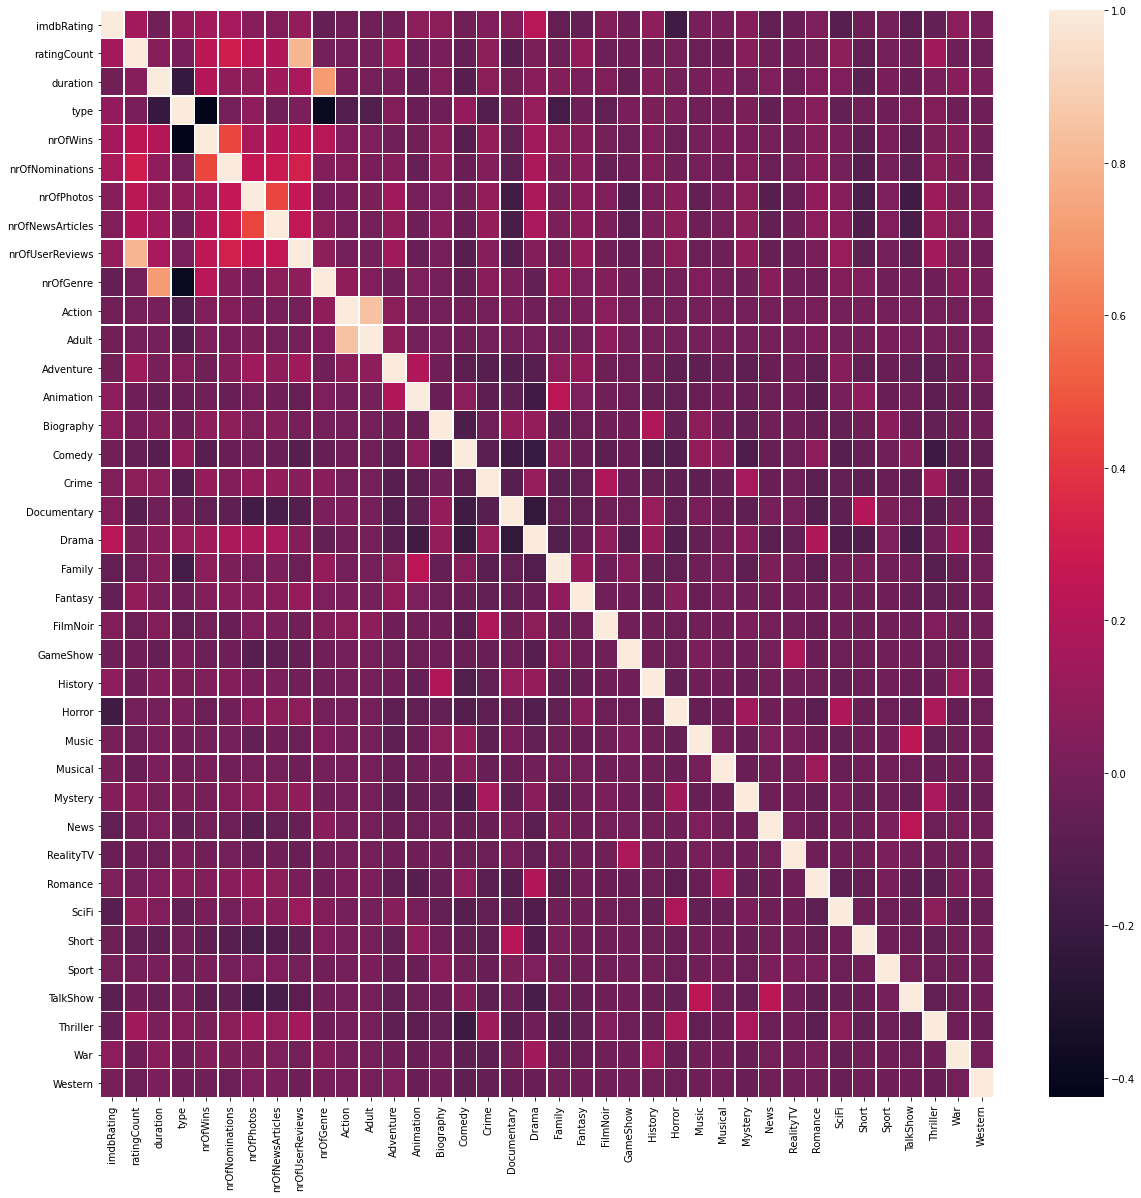

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=.3)

### **2.2. Boxplot**
1. Box plot is used to view outliers present in the dataset.
2. What is outlier? An outlier is an observation point that is distant from other observations.

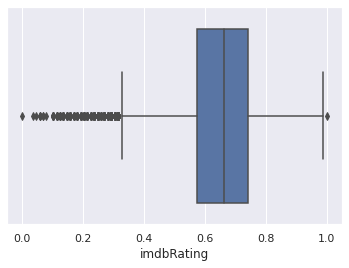

In [31]:
sns.set(style='darkgrid')
sns.boxplot(x=df['imdbRating'])

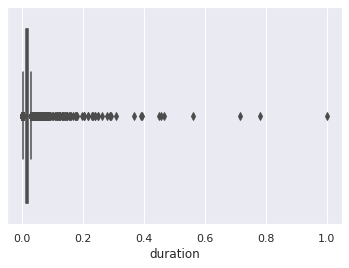

In [32]:
sns.boxplot(x=df['duration'])

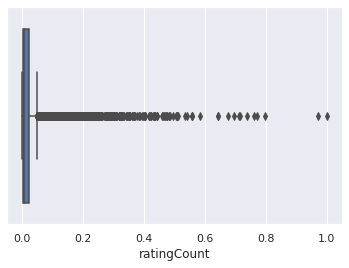

In [33]:
sns.boxplot(x=df['ratingCount'])

Using **Z-Score** method to remove outliers. But it might have some data loss.

In [34]:
from scipy import stats
z_score = np.abs(stats.zscore(df))
print(z_score,z_score.shape)

[[1.49199225 0.23131281 0.3420351  ... 0.31181306 0.1831358  0.15145403]
 [1.39973788 0.30832487 0.01086849 ... 0.31181306 0.1831358  0.15145403]
 [1.49199225 0.88463151 0.4576111  ... 0.31181306 0.1831358  0.15145403]
 ...
 [0.20043101 0.42318473 0.29357169 ... 0.31181306 0.1831358  0.15145403]
 [0.61468992 0.04076129 0.29357169 ... 0.31181306 0.1831358  0.15145403]
 [0.75395725 0.42207049 0.53588873 ... 0.31181306 0.1831358  0.15145403]] (14761, 38)


In [35]:
df_outliers_removed = df[(z_score < 3).all(axis=1)]
df_outliers_removed.shape

(4781, 38)

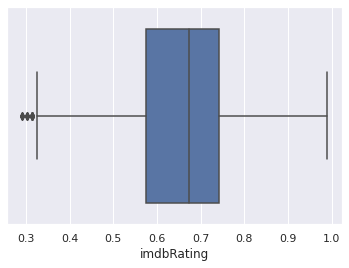

In [36]:
sns.boxplot(x=df_outliers_removed['imdbRating'])

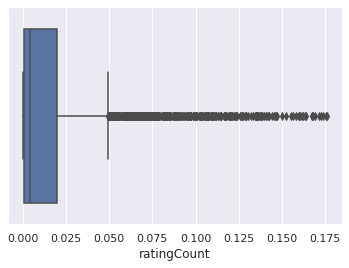

In [37]:
sns.boxplot(x=df_outliers_removed['ratingCount'])

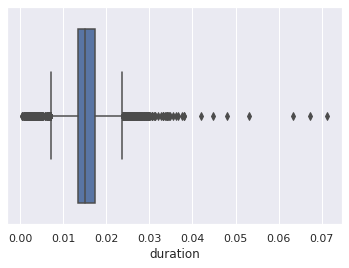

In [38]:
sns.boxplot(x=df_outliers_removed['duration'])

Using **IQR Score** method to remove outliers. This also cause some data loss.

In [39]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

imdbRating          0.166692
ratingCount         0.019368
duration            0.006647
type                0.000000
nrOfWins            0.310606
nrOfNominations     0.309211
nrOfPhotos          0.617021
nrOfNewsArticles    0.562821
nrOfUserReviews     0.020089
nrOfGenre           0.000646
Action              0.000000
Adult               0.000000
Adventure           0.000000
Animation           0.000000
Biography           0.000000
Comedy              1.000000
Crime               0.000000
Documentary         0.000000
Drama               1.000000
Family              0.000000
Fantasy             0.000000
FilmNoir            0.000000
GameShow            0.000000
History             0.000000
Horror              0.000000
Music               0.000000
Musical             0.000000
Mystery             0.000000
News                0.000000
RealityTV           0.000000
Romance             0.000000
SciFi               0.000000
Short               0.000000
Sport               0.000000
TalkShow      

In [40]:
df_out_rem = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out_rem.shape

(1036, 38)

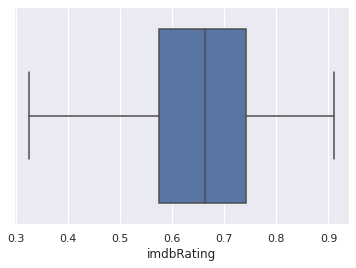

In [41]:
sns.boxplot(x=df_out_rem['imdbRating'])

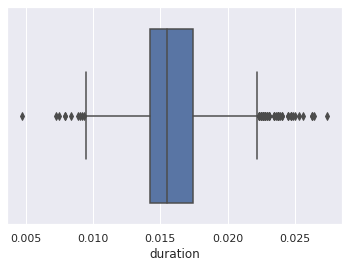

In [42]:
sns.boxplot(x=df_out_rem['duration'])

### **2.3. Scatterplot**

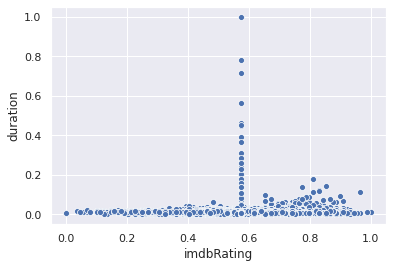

In [43]:
sns.scatterplot(x=df['imdbRating'], y=df['duration'])

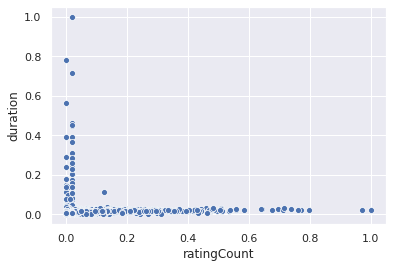

In [44]:
sns.scatterplot(x=df['ratingCount'],y=df['duration'])

## **3. K-Means Clustering**
1. Objective : Minimize the sum of distances between the points and the respective cluster centroid.
2. It is a distance based algorithm / centroid based algorithm. Use scaling or normalization.
3. Steps to perform:
      1. Choose no of cluster(k) 
      2. Select k random points from data as centroid
      3. Assign all points to the closest cluster centroid
      4. Recompute centroid of new clusters
      5. Repeat step 3 & 4
4. Stopping Criteria:
      1. Centroid of newly formed cluster do not change.
      2. Points remain in the same cluster.
      3. Set maximum no of iterations.
5. Evaluation metrix : Inertia, Dunn Index

### **3.1. Find K-value**

In [45]:
WCSS = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=2)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)

In [46]:
WCSS

[29197.830128521564,
 25042.168627088548,
 22635.655780715297,
 21432.939814513193,
 20463.344912163462,
 19594.321441214288,
 18889.46416250498,
 18036.350522241715,
 17389.68506407817,
 17062.315399424977,
 16542.74420920781,
 16163.174544772712,
 15770.127056614287,
 15361.400165050378,
 15217.948474084887,
 14948.074576420257,
 14571.26571387888,
 14316.187153003259,
 14029.160503634099,
 13700.784229240877]

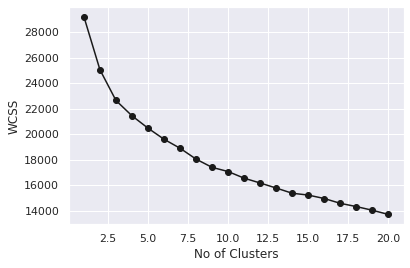

In [47]:
# Elbow Curve to find the final k-value
plt.plot(range(1,21),WCSS,marker='o',c='k')
plt.ylabel('WCSS')
plt.xlabel('No of Clusters')
plt.show()

### **3.2. Training & fitting model**

In [48]:
# Final k-value = 14 decided from elbow curve
k_means_model = KMeans(n_clusters=15, init='k-means++', max_iter=300, n_init=10, random_state=2)

In [49]:
k_means_model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [50]:
# To know centroids of each cluster
k_means_model.cluster_centers_

array([[ 6.66660624e-01,  4.99849671e-03,  1.35464975e-02,
         9.75000000e-01,  8.53548438e-02,  7.34251432e-02,
         1.31630891e-01,  1.13098955e-01,  3.42233867e-03,
         2.85638369e-03,  7.78096951e-04,  7.43226026e-05,
         2.87852619e-04,  3.45423143e-03,  1.20034542e-01,
         4.40414508e-02,  2.50431779e-02,  1.00000000e+00,
         7.77202073e-03,  1.98618307e-02,  4.31778929e-03,
         1.72711572e-03,  8.63557858e-04,  1.15716753e-01,
         1.38169257e-02,  4.40414508e-02,  4.31778929e-03,
         4.31778929e-03,  1.38169257e-02,  6.90846287e-03,
         8.63557858e-04,  2.59067358e-03,  1.77892919e-01,
         2.76338515e-02,  1.72711572e-02,  1.94289029e-15,
         2.41796200e-02,  1.72711572e-03],
       [ 6.57455839e-01,  4.86786924e-02,  1.69903381e-02,
         9.87065561e-01,  2.02579707e-01,  2.19404777e-01,
         4.78935882e-01,  3.92274274e-01,  4.25492014e-02,
         1.68955661e-03,  1.63912285e-04,  2.42793878e-06,
         1.65

### **3.3. Predicting model**

In [51]:
k_means_pred = k_means_model.predict(df)

In [52]:
k_means_pred

array([ 8,  2,  4, ...,  6,  5, 14], dtype=int32)

In [53]:
# To add predicted results to the dataset.
df['clusters'] = k_means_model.fit_predict(df)

In [54]:
df.head()

,imdbRating,ratingCount,duration,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,FilmNoir,GameShow,History,Horror,Music,Musical,Mystery,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western,clusters
0,0.831461,0.034263,0.008541,0.991667,0.007576,0.000000,0.313070,0.982051,0.017248,0.001939,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0.820225,0.038293,0.015030,0.991667,0.310606,0.006579,0.565350,0.043590,0.024756,0.001939,0.000000,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.831461,0.068450,0.024209,0.991667,0.469697,0.559211,0.823708,0.622436,0.076299,0.001293,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.820225,0.031703,0.016929,0.991667,0.007576,0.006579,0.732523,0.096795,0.044440,0.001939,0.000518,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.865169,0.059197,0.013764,0.991667,0.310606,0.000000,0.595745,0.278205,0.037744,0.001939,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


### **3.4. Viewing final clusters**
Since we can't able to plot all data points, convert our dataset using PCA decomposition. Use this we can convert our whole dataset into two columns.

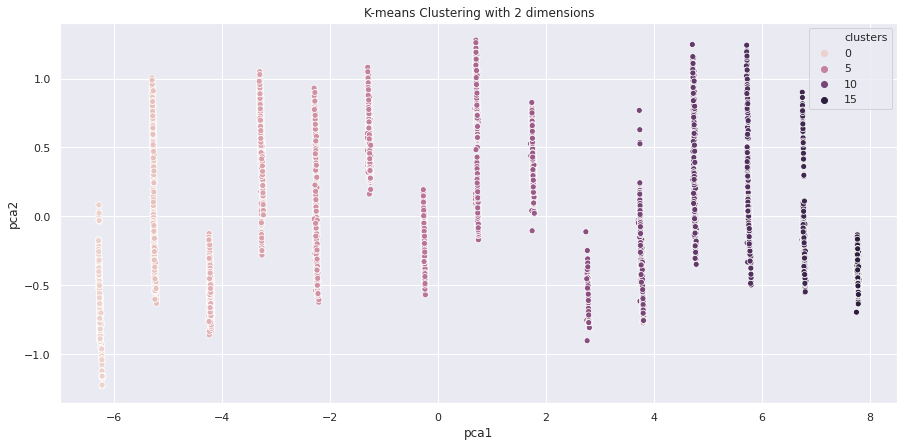

In [55]:
from sklearn.decomposition import PCA

plt.figure(figsize=(15,7))
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_df = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_df,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

# **4. The End**